<a href="https://colab.research.google.com/github/mwl10/hetvae/blob/errors/src/preprocess_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
import shutil#
os.chdir('/content')
if os.path.isdir('./hetvae'):
  shutil.rmtree('./hetvae/')
! git clone --branch errors https://github.com/mwl10/hetvae
os.chdir('/content/hetvae')
! pip install -r requirements.txt
os.chdir('/content/hetvae/src')
import numpy as np
import torch
import torch.optim as optim
import models
from argparse import Namespace
import torch.optim as optim
import utils
import my_utils
import pandas as pd
import importlib
import vae_models
importlib.reload(vae_models)
importlib.reload(models)
importlib.reload(utils)
importlib.reload(my_utils)
from glob import glob
import matplotlib.pyplot as plt
import sys
from scipy import signal as si

#del sys.modules['dataset']
from dataset import DataSet
%matplotlib inline

Cloning into 'hetvae'...
remote: Enumerating objects: 2262, done.
remote: Counting objects: 100% (402/402), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 2262 (delta 276), reused 296 (delta 198), pack-reused 1860
Receiving objects: 100% (2262/2262), 27.53 MiB | 13.74 MiB/s, done.
Resolving deltas: 100% (879/879), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
#--------------------------------------------------------------------------------------------------------
# PREPROCESSING, from Catalina data
#--------------------------------------------------------------------------------------------------------
lc_files = glob('/content/hetvae/data/CAT/*/*')[:50]

Catalina = DataSet() \
            .add_files(lc_files) \
            .files_to_numpy() \
            .handle_dups()

            
            # .prune_outliers() \
            # .resample_dataset(num_samples=1) \
            # .normalize() \
            # .reorder() \
            # .set_union_x() \
            # .zero_fill() \
            # .error_to_sample_weight() \
            # .make_masks(frac=0.5)

# print(
#     Catalina.files, '\n',
#     Catalina.union_x.shape,
#     Catalina.dataset.shape,
#     Catalina.subsampled_mask.shape,
#     Catalina.recon_mask.shape
#   )
# fig,ax = plt.subplots(5,1, figsize=(20,20))
# for i in range(5):
#     ax[i].scatter(Catalina.dataset[i,:-130,0], Catalina.dataset[i,:-130,1])

dims of /content/hetvae/data/CAT/CSS/CSS171011:233604-121242_17.67.dat:	(406, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170325:125540+395120_18.55.dat:	(802, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170322:145644+395340_20.7.dat:	(419, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170430:121139+401258_20.22.dat:	(437, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170920:222515-080102_17.54.dat:	(725, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170130:093832+503858_19.45.dat:	(596, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170924:001108+195550_18.68.dat:	(358, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170302:114849+005511_20.26.dat:	(424, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170322:092410+584144_19.69.dat:	(469, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170131:020924-031049_19.67.dat:	(292, 3)
dims of /content/hetvae/data/CAT/CSS/CSS171011:022657-035945_18.76.dat:	(414, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170202:100034+455823_19.25.dat:	(253, 3)
dims of /content/hetvae/data/

In [ ]:
# three point median filter

# clipping of all points that deviated significantly from a quintic polynomial fit to the data 

# clipping threshold was initially set to 0.25 mag and then iteratively increased (if necessary) until no more 
# than 10 percent of the points were rejected




(196, 3)
0.00510204081632653
(170, 3)


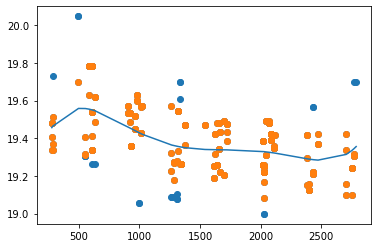

In [48]:
for lc in Catalina.dataset[1:]: 
  lc[:,1] = si.medfilt(lc[:,1], kernel_size=3)
  plt.scatter(lc[:,0], lc[:,1])
  print(lc.shape)
  quintic_fit = np.polyfit(lc[:,0], lc[:,1], deg=5)
  quintic_y = np.array([lc[:,0]**5, lc[:,0] ** 4, lc[:,0] ** 3, lc[:,0] ** 2 , lc[:,0], np.ones(len(lc))])
  quintic_y = np.matmul(quintic_y.T, quintic_fit)
  plt.plot(lc[:,0], quintic_y)
  dev = np.abs(lc[:,1] - quintic_y)
  # check ten percent? 
  outliers = np.where(dev >= 0.25)

  percentage = len(outliers)/ len(lc)
  print(percentage)
  lc = np.delete(lc, outliers, axis=0)
  plt.scatter(lc[:,0], lc[:,1])
  print(lc.shape)
  
  break

In [22]:
quintic_fit

array([ 7.56118672e-16, -4.93099268e-12,  1.16559163e-08, -1.18342745e-05,
        4.13440408e-03,  1.20625652e-01])